## Import modules
Импортируем необходииые модули для работы с массивами, таблицами и графиками.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define f(x) and epsilons

In [32]:
fn = lambda x: 3/np.tan(x) - x**2 * np.sqrt(x/(4 - x))
eps = [0.01, 0.001, 0.0001]

## Plot f(x)
Стоит учесть, что нас интересует интервал (0,3), т.к. на нем всюду функция существует и дифференцируема.  
Выберем две произвольные точки: первая - в положительной плоскости, вторая - в отрицательной.

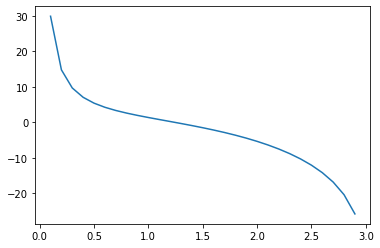

In [33]:
plt.plot([x/10 for x in range(1, 30)],[fn(x/10) for x in range(1, 30)])
points = [0.5, 2.5]

## Методы
В таблицах ниже представлены шаги и результаты метода на каждом шаге. Пустые ячейки таблицы содержат значение `NaN`.

### Метод бисекции

In [37]:
df = pd.DataFrame()

def bisection(eq, a, b, e=0.01):
    df = pd.DataFrame(data={f'bisection_{e}': []})
    vals = []

    Fa, Fb = eq(a), eq(b)
    if Fa * Fb > 0:
        raise ValueError('Решение невозможно: f(a) * f(b) <= 0')
    # Пока точность не станет допустимой
    while(b - a > e): 
        # середина
        x = np.mean([a, b])
        # значение функции в новой средней точке
        f = eq(x)
        # выбираем новую точку вместо a или b
        if f * Fa > 0:
            a = x
        else:
            b = x
        vals += [x]
    df[f'bisection_{e}'] = vals
    return df

 
for e in eps:
    df = pd.concat([df, bisection(fn, *points, e)], axis=1)
df

,bisection_0.01,bisection_0.001,bisection_0.0001
0,1.500000,1.500000,1.500000
1,1.000000,1.000000,1.000000
2,1.250000,1.250000,1.250000
3,1.125000,1.125000,1.125000
4,1.187500,1.187500,1.187500
5,1.218750,1.218750,1.218750
6,1.234375,1.234375,1.234375
7,1.242188,1.242188,1.242188
8,NaN,1.238281,1.238281
9,NaN,1.240234,1.240234


### Метод секущих

In [44]:
tmp = pd.DataFrame()

def secant(f, x0, x1, e=0.01):
    df = pd.DataFrame(data={f'secant_{e}': []})
    vals = []
    x2= x1
    while abs(f(x2)) > e:
        if f(x0) == f(x1):
            print('Деление на ноль')
            break
        # формула итерационного процесса
        x2 = x0 - (x1 - x0) * f(x0)/(f(x1) - f(x0)) 
        x0 = x1
        x1 = x2
        vals += [x2]

    df[f'secant_{e}'] = vals
    return df

for e in eps:
    tmp = pd.concat([tmp, secant(fn, *points, e)], axis=1)
    
df = pd.concat([df, tmp], axis=1)
tmp

,secant_0.01,secant_0.001,secant_0.0001
0,1.117445,1.117445,1.117445
1,1.191520,1.191520,1.191520
2,1.240107,1.240107,1.240107
3,NaN,NaN,1.239932


### Метод ложной позиции

In [45]:
tmp = pd.DataFrame()

def falsePosition(f, x0, x1, e=0.01):
    df = pd.DataFrame(data={f'falsePosition_{e}': []})
    step = 1
    vals = []

    condition = True
    while condition:
        # формула итерационного процесса
        x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )

        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2

        vals += [x2]
        step = step + 1
        condition = abs(f(x2)) > e

    df[f'falsePosition_{e}'] = vals
    return df

for e in eps:
    tmp = pd.concat([tmp, falsePosition(fn, *points, e)], axis=1)
df = pd.concat([df, tmp], axis=1)
tmp

,falsePosition_0.01,falsePosition_0.001,falsePosition_0.0001
0,1.117445,1.117445,1.117445
1,1.191520,1.191520,1.191520
2,1.220218,1.220218,1.220218
3,1.231821,1.231821,1.231821
4,1.236582,1.236582,1.236582
5,1.238547,1.238547,1.238547
6,NaN,1.239359,1.239359
7,NaN,1.239695,1.239695
8,NaN,1.239834,1.239834
9,NaN,NaN,1.239892


### Метод Ньютона

In [43]:
tmp = pd.DataFrame()

def newton(f, Df, x0, epsilon=0.01):
    df = pd.DataFrame(data={f'newton_{e}': []})
    vals = []

    try:
        xn = x0
        while True:
            # значение первообразной функции в точке
            fxn = f(xn)
            if abs(fxn) < epsilon:
                df[f'newton_{e}'] = vals
                return df

            # значение производной функции в точке
            Dfxn = Df(xn)
            if Dfxn == 0:
                print('Деление на ноль.')
                return None

            vals += [xn]
            # новая точка
            xn = xn - fxn/Dfxn
    except:
        print("Нет решения.")
        df[f'newton_{e}'] = vals
        return df

for e in eps:
    tmp_ = newton(fn,
           lambda x: -(x*x**2)/((x - 4)**2 * np.sqrt(-x/(x-4)))-2*np.sqrt(-x/(x-4))*x-3*(1/np.sin(x))**2,
           np.mean(points), e)
    tmp = pd.concat([tmp, tmp_], axis=1)
df = pd.concat([df, tmp], axis=1)
tmp

,newton_0.01,newton_0.001,newton_0.0001
0,1.500000,1.500000,1.500000
1,1.246505,1.246505,1.246505
2,NaN,1.239658,1.239658


## Show final table
В таблице ниже представлены результаты всех реализованных методов.

In [22]:
df

,bisection_0.01,bisection_0.001,bisection_0.0001,secant_0.01,secant_0.001,secant_0.0001,falsePosition_0.01,falsePosition_0.001,falsePosition_0.0001,newton_0.01,newton_0.001,newton_0.0001
0,1.500000,1.500000,1.500000,1.117445,1.117445,1.117445,1.117445,1.117445,1.117445,1.500000,1.500000,1.500000
1,1.000000,1.000000,1.000000,1.191520,1.191520,1.191520,1.191520,1.191520,1.191520,1.246505,1.246505,1.246505
2,1.250000,1.250000,1.250000,1.240107,1.240107,1.240107,1.220218,1.220218,1.220218,NaN,1.239658,1.239658
3,1.125000,1.125000,1.125000,NaN,NaN,1.239932,1.231821,1.231821,1.231821,NaN,NaN,NaN
4,1.187500,1.187500,1.187500,NaN,NaN,NaN,1.236582,1.236582,1.236582,NaN,NaN,NaN
5,1.218750,1.218750,1.218750,NaN,NaN,NaN,1.238547,1.238547,1.238547,NaN,NaN,NaN
6,1.234375,1.234375,1.234375,NaN,NaN,NaN,NaN,1.239359,1.239359,NaN,NaN,NaN
7,1.242188,1.242188,1.242188,NaN,NaN,NaN,NaN,1.239695,1.239695,NaN,NaN,NaN
8,NaN,1.238281,1.238281,NaN,NaN,NaN,NaN,1.239834,1.239834,NaN,NaN,NaN
9,NaN,1.240234,1.240234,NaN,NaN,NaN,NaN,NaN,1.239892,NaN,NaN,NaN


In [30]:
# !pip install openpyxl
# df.to_excel('Final_table.xlsx')